In [598]:
def get_mesh_center(mesh_bounds):
    centerX = (mesh_bounds[1] + mesh_bounds[0]) / 2
    centerY = (mesh_bounds[3] + mesh_bounds[2]) / 2
    centerZ = (mesh_bounds[5] + mesh_bounds[4]) / 2
    
    return [centerX, centerY, centerZ]

In [599]:
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

def get_cmap_fro_range(scalar_range: np.ndarray, n_divs: int) -> LinearSegmentedColormap:
    full_colors = ['#062544', '#03619F', '#00A3D6', '#01A781', '#2ABC29', '#CDECAF', "#FFF585", "#FFF22A", "#FEA500", "#F60100", "#A70012", "#510007"]
    N = len(full_colors)
    
    if np.all(scalar_range <= 0):
        hex_colors = full_colors[:5]
    elif np.all(scalar_range >= 0):
        hex_colors = full_colors[6:]
    elif np.abs(scalar_range.min()) > np.abs(scalar_range.max()):
        delta = (scalar_range.max() - scalar_range.min()) / N
        n_min = round(-scalar_range.min() / delta - 0.5)
        n_max = N - 1 - n_min
        hex_colors = full_colors[:6 + n_max]
    elif np.abs(scalar_range.min()) < np.abs(scalar_range.max()):
        delta = (scalar_range.max() - scalar_range.min()) / N
        n_max = round(scalar_range.max() / delta - 0.5)
        n_min = N - 1 - n_max
        hex_colors = full_colors[7 - n_min:]
    else:
        hex_colors = full_colors

    rgb_colors = [tuple(int(color.lstrip('#')[i:i+2], 16) / 255 for i in (0, 2, 4)) for color in hex_colors]

    custom_cmap = LinearSegmentedColormap.from_list('custom_colormap', rgb_colors, N=n_divs)
    
    return custom_cmap
    

In [600]:
from PIL import Image

def crop_image_center(image_path, width_ratio, height_ratio):
    # Open the image using Pillow
    original_image = Image.open(image_path)

    # Get the original width and height
    original_width, original_height = original_image.size

    # Calculate the crop box based on percentages and center
    crop_width = original_width * width_ratio
    crop_height = original_height * height_ratio

    left = (original_width - crop_width) / 2
    top = (original_height - crop_height) / 2
    right = (original_width + crop_width) / 2
    bottom = (original_height + crop_height) / 2

    # Crop the image
    cropped_image = original_image.crop((left, top, right, bottom))

    return cropped_image

In [601]:
projections = {
    "x_plus": [0,-90,0],
    "x_minus": [0,90,0],
    "y_plus": [-90,0,0],
    "y_minus": [90,0,0],
}

COLORMAP_N_DIVS = 10
OFFSET_VALUE = 15

In [602]:
sargs = dict(
    title="Ce_mean_qs\n",
    title_font_size=24,
    label_font_size=20,
    n_labels=COLORMAP_N_DIVS + 1,
    italic=False,
    fmt="%.2f",
    font_family="arial",
    position_x=0.2,
    position_y=0.0,
    width = 0.6
)

In [603]:
import pyvista as pv
import numpy as np


pv.set_jupyter_backend('static')  
pv.set_plot_theme("document")
# pv.global_theme.transparent_background = True


plotter = pv.Plotter(window_size=[800,800])
plotter.enable_parallel_projection()
file_path = "fixtures/tests/snapshot/G200_Ce_5x5.vtp"
original_mesh = pv.read(file_path)

original_bounds = original_mesh.bounds
original_center = get_mesh_center(original_bounds)

# original_mesh.set_active_scalars()
# original_mesh.cell_data.keys()
# original_mesh.set_active_scalars("cp_mean")
original_mesh.set_active_scalars("Ce_mean_qs")

scalar_arr = original_mesh.active_scalars[~np.isnan(original_mesh.active_scalars)]
scalar_range = np.array([scalar_arr.min(), scalar_arr.max()])
plotting_cmap = get_cmap_fro_range(scalar_range=scalar_range, n_divs=COLORMAP_N_DIVS)

plotter.add_mesh(original_mesh, lighting=False, cmap=plotting_cmap, scalar_bar_args=sargs)
print()

FileNotFoundError: File (/home/ubuntu/Documentos/Repositories/cfdmod/fixtures/tests/snapshot/G200_Ce_5x5.vtp) not found

In [ ]:


for projection, rotation in projections.items():
    duplicated_mesh = original_mesh.copy()

    axes = pv.Axes()
    axes.origin = original_center
    duplicated_mesh.rotate_x(rotation[0], point=axes.origin, inplace=True)
    duplicated_mesh.rotate_y(rotation[1], point=axes.origin, inplace=True)
    
    translation = [0,0,0]
    if projection == "x_plus":
        translation[0] += (original_bounds[1] - original_bounds[0]) / 2 + (original_bounds[5] - original_bounds[4]) / 2 + OFFSET_VALUE
        translation[2] += - (original_bounds[1] - original_bounds[0]) / 2 + (original_bounds[5] - original_bounds[4]) / 2
    elif projection == "x_minus":
        translation[0] -= (original_bounds[1] - original_bounds[0]) / 2 + (original_bounds[5] - original_bounds[4]) / 2 + OFFSET_VALUE
        translation[2] += - (original_bounds[1] - original_bounds[0]) / 2 + (original_bounds[5] - original_bounds[4]) / 2
    elif projection == "y_plus":
        translation[1] -= (original_bounds[3] - original_bounds[2]) / 2 + (original_bounds[5] - original_bounds[4]) / 2 + OFFSET_VALUE
        translation[2] += - (original_bounds[3] - original_bounds[2]) / 2 + (original_bounds[5] - original_bounds[4]) / 2
    elif projection == "y_minus":
        translation[1] += (original_bounds[3] - original_bounds[2]) / 2 + (original_bounds[5] - original_bounds[4]) / 2 + OFFSET_VALUE
        translation[2] += - (original_bounds[3] - original_bounds[2]) / 2 + (original_bounds[5] - original_bounds[4]) / 2
    

    duplicated_mesh = duplicated_mesh.translate(translation, inplace=True)
    # , lighting=False
    plotter.add_mesh(duplicated_mesh, lighting=False, cmap=plotting_cmap, scalar_bar_args=sargs)

/home/ubuntu/.cache/pypoetry/virtualenvs/cfdmod-7yEqALRC-py3.10/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


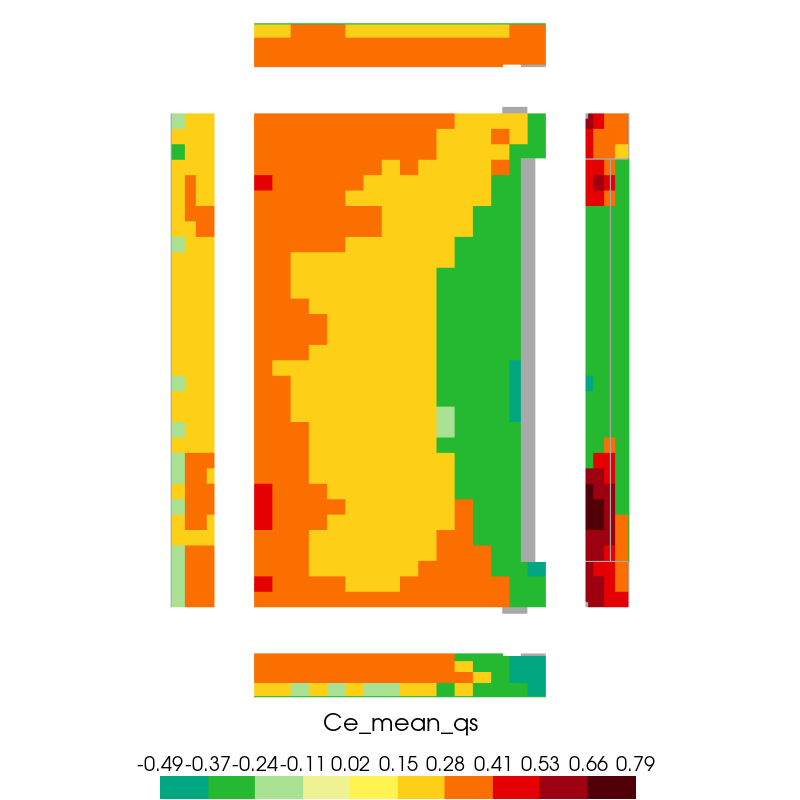

FileNotFoundError: [Errno 2] No such file or directory: '/home/ubuntu/Documentos/Repositories/cfdmod/CE_MEANQS_G200_000.png'

In [ ]:
plotter.camera_position = 'xy'
plotter.camera.SetParallelProjection(True)

# HORIZONTAL
# view_up = (1, 0, 0)      # View up direction G200
# view_up = (0, 1, 0)      # View up direction G300

# VERTICAL
view_up = (0, 1, 0)      # View up direction G200
# view_up = (1, 0, 0)      # View up direction G300

camera = plotter.camera

# offset_pos = np.array([-20.0, 0, 0.0]) # G300
offset_pos = np.array([0, -15, 0.0]) # G200

camera.SetFocalPoint(camera.GetFocalPoint() + offset_pos)
camera.SetPosition(camera.GetPosition() + offset_pos)


plotter.camera.up = view_up
plotter.camera.zoom(1.2)

plotter.show()
plotter.screenshot("output_image.png")

plotter.close()